In [1]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [3]:
import pathlib
data_dir = pathlib.Path("/home/mabrq/Projects/Image-Clasification/Fruit_Vegetable_Classification/Dataset/V1")

In [16]:
batch_size = 8
img_height = 224
img_width = 224
num_classes=8

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 19952 files belonging to 8 classes.
Using 15962 files for training.
Found 19952 files belonging to 8 classes.
Using 3990 files for validation.


In [17]:
class_names = np.array(train_ds.class_names)
print(class_names)


['Fava_Beans' 'Garlic' 'Ginger' 'Green_Chilly' 'Mango' 'Okra'
 'Pomagranate' 'Tomato']


In [18]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5"

In [19]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=True)


In [20]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [21]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])


In [22]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              5508713   
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 8016      
Total params: 5,516,729
Trainable params: 5,492,329
Non-trainable params: 24,400
_________________________________________________________________


In [23]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


In [24]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)


499/499 [==============================] - 12s 22ms/step - loss: 12123434.4700 - acc: 0.1486


In [25]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

batch_stats_callback = CollectBatchStats()

history = model.fit(train_ds, epochs=10,
                    callbacks=[batch_stats_callback])


Epoch 1/10
1996/1996 [==============================] - 190s 92ms/step - loss: 0.3135 - acc: 1.0000
Epoch 2/10
1996/1996 [==============================] - 181s 91ms/step - loss: 0.2907 - acc: 1.0000
Epoch 3/10
1996/1996 [==============================] - 183s 92ms/step - loss: 2.7679 - acc: 0.5000
Epoch 4/10
1996/1996 [==============================] - 180s 90ms/step - loss: 0.4954 - acc: 1.0000
Epoch 5/10
1996/1996 [==============================] - 172s 86ms/step - loss: 0.2399 - acc: 1.0000
Epoch 6/10
1996/1996 [==============================] - 172s 86ms/step - loss: 0.2182 - acc: 1.0000
Epoch 7/10
1996/1996 [==============================] - 172s 86ms/step - loss: 0.3712 - acc: 1.0000
Epoch 8/10
1996/1996 [==============================] - 172s 86ms/step - loss: 0.2178 - acc: 1.0000
Epoch 9/10
1996/1996 [==============================] - 172s 86ms/step - loss: 2.6541 - acc: 0.5000
Epoch 10/10
1996/1996 [==============================] - 172s 86ms/step - loss: 0.2160 - acc: 1.0000

In [26]:
history = model.fit(train_ds,
                    epochs=55,
                    validation_data=val_ds)

Epoch 1/55
1996/1996 [==============================] - 198s 99ms/step - loss: 0.2867 - acc: 0.9924 - val_loss: 0.7845 - val_acc: 0.9358
Epoch 2/55
1996/1996 [==============================] - 200s 100ms/step - loss: 0.2889 - acc: 0.9925 - val_loss: 0.2026 - val_acc: 1.0000
Epoch 3/55
1996/1996 [==============================] - 201s 101ms/step - loss: 0.2728 - acc: 0.9912 - val_loss: 0.2072 - val_acc: 1.0000
Epoch 4/55
1996/1996 [==============================] - 195s 97ms/step - loss: 0.2284 - acc: 0.9962 - val_loss: 0.1931 - val_acc: 1.0000
Epoch 5/55
1996/1996 [==============================] - 201s 100ms/step - loss: 0.2941 - acc: 0.9923 - val_loss: 0.2200 - val_acc: 0.9990
Epoch 6/55
1996/1996 [==============================] - 201s 101ms/step - loss: 0.2071 - acc: 0.9969 - val_loss: 0.1762 - val_acc: 1.0000
Epoch 7/55
1996/1996 [==============================] - 189s 94ms/step - loss: 0.1758 - acc: 0.9973 - val_loss: 1.4837 - val_acc: 0.8203
Epoch 8/55
1996/1996 [===============

KeyboardInterrupt: 

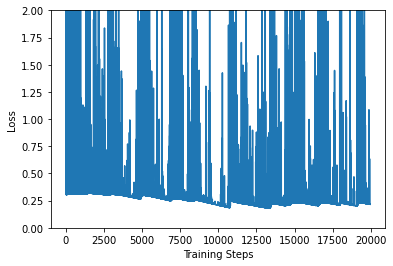

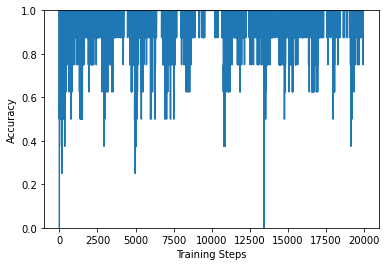

In [28]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)



In [29]:
from tensorflow import keras
import numpy as np

img = keras.preprocessing.image.load_img(
    'j1.jpg', target_size=(224, 224)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(predictions)
print(score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

[[ 1.7976803  2.3789492  3.057259  -7.759441   5.1125684 -1.460091
  -3.9362261 -3.306305 ]]
tf.Tensor(
[2.9516457e-02 5.2784454e-02 1.0401411e-01 2.0866960e-06 8.1227255e-01
 1.1356174e-03 9.5468509e-05 1.7923868e-04], shape=(8,), dtype=float32)
This image most likely belongs to Mango with a 81.23 percent confidence.


In [27]:
t= time.time()

export_path = "saved_models/MobileNetV3_10_E_Trainable".format(int(t))
model.save(export_path)

export_path

INFO:tensorflow:Assets written to: saved_models/MobileNetV3_10_E_Trainable/assets
INFO:tensorflow:Assets written to: saved_models/MobileNetV3_10_E_Trainable/assets


'saved_models/MobileNetV3_10_E_Trainable'